# Horseshoe Sparse Prior
https://github.com/ksnxr/SSGRLDNDM/tree/master

---- Finished running BAOAB ----
---- Finished running ZBAOABZ ----


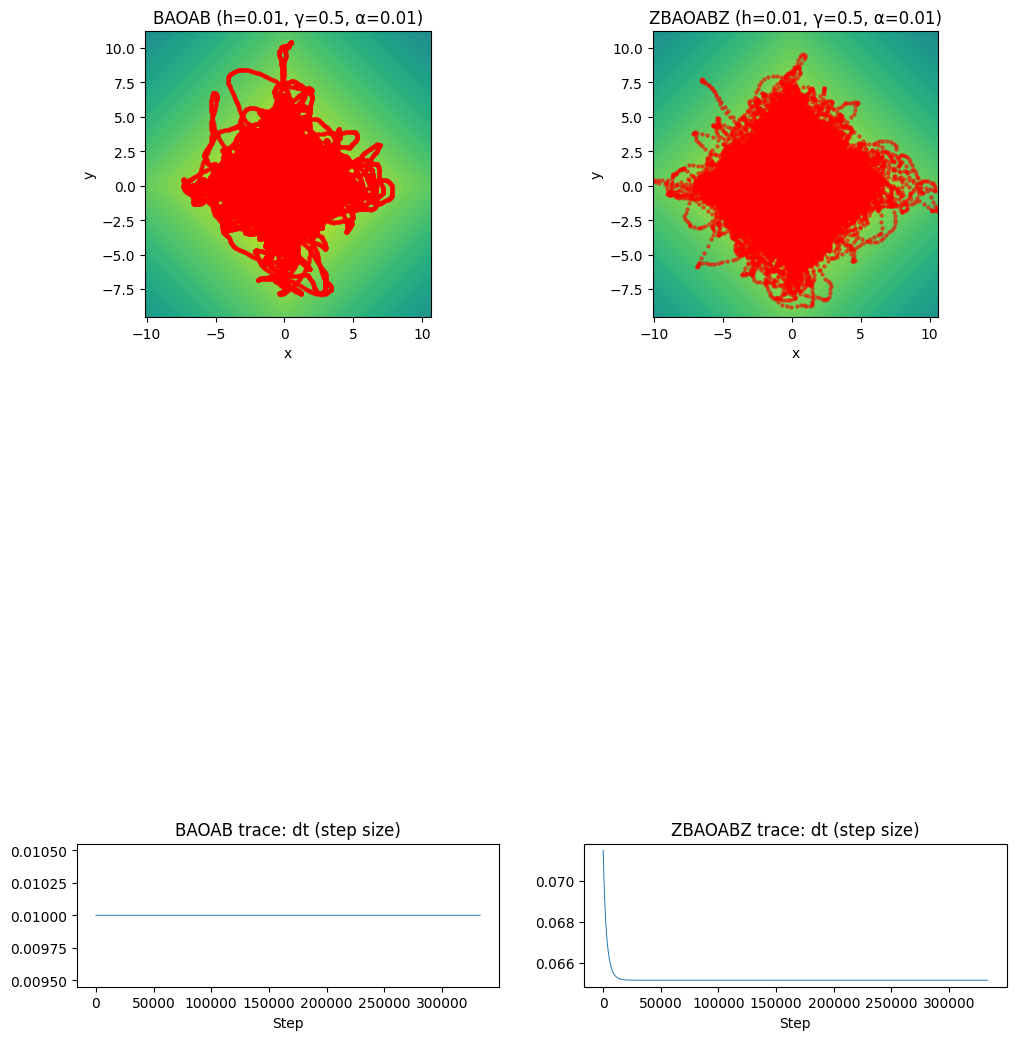

In [5]:
import numpy as np, math
from numba import njit, vectorize, float64
from ipywidgets import interact, FloatLogSlider
import warnings
warnings.filterwarnings("ignore")
from viz import plot_samplers
from ipywidgets import fixed
# from scipy.special import exp1

###############################################################################################
# Laplace distribution: x, y ~ Laplace(mu, beta)
mu_x, mu_y = 0, 0
b_x, b_y = 1, 1

@njit
def grad_U(z):
    y, x = z
    grad_x = np.sign(x - mu_x) / b_x
    grad_y = np.sign(y - mu_y) / b_y
    return np.array([grad_y, grad_x])

@njit
def log_p(y, x):
    return - np.log(4 * b_x * b_y) - np.abs(x - mu_x) / b_x - np.abs(y - mu_y) / b_y
###############################################################################################

###############################################################################################
# # banana
# sm2, bt = 20, 100
# @njit
# def grad_U(z):
#     y, x = z
#     grad_x = 1 / sm2 * (- (1 - x) - 2 * bt * x * (y - x ** 2))
#     grad_y = bt / sm2 * (y - x ** 2)
#     return np.array([grad_y, grad_x])
#
# @njit
# def log_p(y, x):
#     return - 1 / (2 * sm2) * ((1 - x) ** 2 + bt * (y - x ** 2) ** 2)
###############################################################################################

xs = np.linspace(-100, 100, 300)
ys = np.linspace(-100, 100, 300)
X, Y = np.meshgrid(xs, ys)
LOGZ = log_p(Y, X)
vmax, vmin = LOGZ.max(), LOGZ.max() - 40
levels = np.linspace(vmin, vmax, 60)
m, M, r, s = 0.5, 50, 0.25, 2
b = 1 # BAOAB stepsize multiplier
burnin = int(1e4)
nsteps = int(1e6)

plot_samplers(
    alpha=0.01,
    h=0.01,
    gamma=0.5,
    beta=1.,
    grad_U=grad_U,
    X=X,
    Y=Y,
    LOGZ=LOGZ,
    levels=levels,
    m=m,
    M=M,
    r=r,
    s=s,
    b=b,
    burnin=burnin,
    nsteps=nsteps,
    record_trace=True,
    plot_stride=3)
